102
['2020-12-31', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29', '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-02', '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-19', '

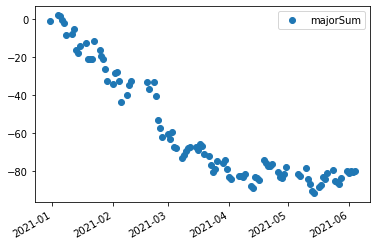

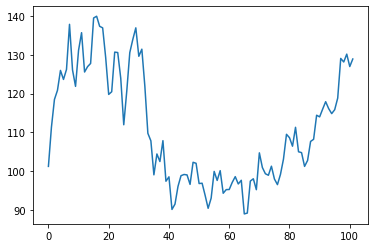

In [141]:
import os

path="C:\\Users\\Administrator\\Desktop\\github\\finance\\data\\"+"002460"+".txt"

with open(path, "r",encoding = 'utf-8') as f:  # 打开文件
    text = f.read()  # 读取文件

lines = text.split("\n")
print(len(lines))
l = len(lines)
m = l/2
for i in range(int(m)):
    lines[i],lines[l-1] = lines[l-1],lines[i]
    l = l-1
    

    
def convertToWan(s):
    """统一转成数据，单位万
    """
    if s.endswith("万"):
        x = s[:-1]
        coe = 10000
    elif s.endswith("亿"):
        x = s[:-1]
        coe = 100000000
    else:
        x = s
        coe = 1
    
    
    if x.startswith("-"):
        v = 0 - float(x[1:]) * coe
    else:
        v = float(x) *coe
    
    return int(v)

startDate =  0
# 日期，价格，成交量，主力majorSum，superBigSum超大单，bigSum大单，middleSum中单，smallSum小单
dates,prices, totals,majors,majorSums,superBigs,superBigSums,bigs,bigSums,middles,middleSums,smalles,smallSums =[],[],[],[],[],[],[],[],[],[],[],[],[]

def add(target,sumTarget,ele):
    amount = convertToWan(ele)
    
    target.append(int(amount))
    if len(sumTarget) == 0:
        sumTarget.append(int(amount))
    else:
        sumTarget.append(int((sumTarget[-1]+amount)))
for line in lines:
  
    if line.strip() == "":
      continue 
    
    words = line.split(" " )
    if len(words) < 1:
        continue
    dates.append(words[0])
    prices.append(float(words[1]))
    
    add(majors,majorSums,words[3])
    add(superBigs,superBigSums,words[5])
    add(bigs,bigSums,words[7])
    add(middles,middleSums,words[9])
    add(smalles,smallSums,words[11])
    
    
    
    

print(dates)
print(majors)
# print(len(majorSums))
print(majorSums)

# if majorSums[0] < 0:
#     delta = 0 -majorSums[0]
#     for index,x in enumerate(majorSums):
#         majorSums[index] = majorSums[index]+delta
        
# print(majorSums)

# 

import matplotlib.pyplot as plt


v = [x for x in range(len(majorSums))]

# fig, majorax = plt.subplots()  # Create a figure containing a single axes.
# majorax.plot(v,majors)


fig, ax = plt.subplots()  # Create a figure containing a single axes.

# ax_v = [y/100000000 for y in majorSums]
ax_date = [datetime.date(int(d.split("-")[0]),int(d.split("-")[1]),int(d.split("-")[2])) for d in dates]
print(ax_date)
ax.plot_date(ax_date,ax_v,label="majorSum")  # Plot some data on the axes.

# ax.plot(v,bigSums)
# ax.plot(v,middleSums)
# ax.plot(v,smallSums,label="smallSum")
# ax.plot(v,prices,label="price")
ax.legend()
fig.autofmt_xdate()

plt.show()


# print(len(majorSums))
# print(len(prices[-65:-1]))

pricefig,priceax = plt.subplots()
priceax.plot(v,prices)
    
